In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def rbf_fn(X1, X2):
    return np.exp((np.dot(X1,(2*X2.T)) - np.sum(X1*X1,1)[:,None]) - np.sum(X2*X2,1)[None,:])

In [3]:
def k_fn(X1, X2):
    norms = np.sqrt((-np.dot(X1,(2*X2.T)) + np.sum(X1*X1,1)[:,None]) + np.sum(X2*X2,1)[None,:])
    return (1+norms)*np.exp(-norms)


X_grid = np.arange(0, 10, 1)[:,None]
Y_grid = np.arange(5, 15, 1)[:,None]
res = k_fn(X_grid,X_grid)

In [4]:
L_grid = np.linalg.cholesky(res + 1e-12*np.eye(X_grid.shape[0]))

In [5]:
X_grid = np.arange(0, 500, 0.1)[:, None]
N_grid = X_grid.shape[0]
K_grid = k_fn(X_grid, X_grid) + 1e-8*np.eye(N_grid)
L_grid = np.linalg.cholesky(K_grid)
f_grid = np.dot(L_grid, np.random.randn(N_grid))

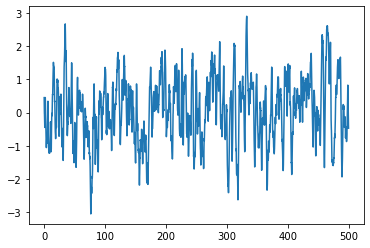

In [6]:
X_grid = np.arange(0, 500, 0.1)[:,None]
N_grid = X_grid.shape[0]
K_grid = k_fn(X_grid, X_grid) + 1e-9*np.eye(N_grid)
L_grid = np.linalg.cholesky(K_grid)
plt.figure(1)
plt.clf()
f_grid = np.dot(L_grid, np.random.randn(N_grid))
plt.plot(X_grid, f_grid, '-')


In [7]:
K = np.empty((N_grid,N_grid))
for i in range(N_grid):
    v = np.column_stack((f_grid[:N_grid-i], f_grid[i:]))
    c = np.cov(v, rowvar=False)
    if i==N_grid-1:
        K[0,i] = np.var(v)
        K[i,0] = np.var(v)
        break
#    print(c.shape)
#    print(i)
#    print(v.shape)
    if i==10:
        pass
    for j in range(N_grid-i):
        K[j,j+i] = c[0,1]
        K[j+i,j] = c[0,1]
        #p +=1

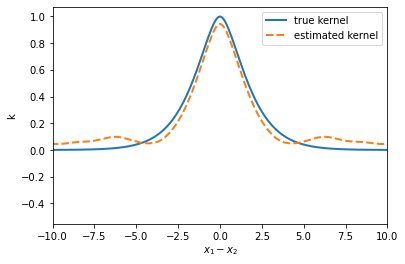

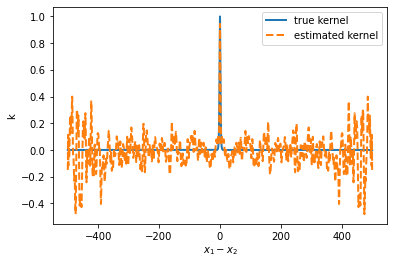

In [8]:
# Mean over all function values
m = np.mean(f_grid)
# Repeat function values along each axes so that we can easily enumerate
# over all pairs
F1_grid = np.transpose([f_grid] * N_grid)
F2_grid = np.tile(f_grid, (N_grid, 1))
# Differences between locations
X_diff = np.concatenate((np.flip(-X_grid[0:-1]), X_grid[1:-1]), axis=0)
# True kernel function values
k_true = np.concatenate((np.flip(K_grid[0][0:-1]), K_grid[0][1:-1]), axis=0)
# Estimate empirical covariance for each delta
cov_emp = np.zeros(N_grid-1)
# Each pair of F1_grid, F2_grid (off-)diagonals
for nn in range(N_grid-1):
    N_pairs = N_grid - nn
    cov_emp[nn] = np.dot(np.diag(F1_grid, nn) - m,
                         np.diag(F2_grid, nn) - m) / N_pairs
k_est = np.concatenate((np.flip(cov_emp), cov_emp[1:]), axis=0)
# Visualise true and estimated kernel function
plt.figure(1)
plt.clf()
plt.plot(X_diff, k_true, linewidth=2)
plt.plot(X_diff, k_est, linestyle='dashed', linewidth=2)
plt.xlim([-10, 10])
plt.legend(['true kernel', 'estimated kernel'])
plt.xlabel('$x_1-x_2$')
plt.ylabel('k')
plt.show()
plt.figure(2)
plt.clf()
plt.plot(X_diff, k_true, linewidth=2)
plt.plot(X_diff, k_est, linestyle='dashed', linewidth=2)
plt.legend(['true kernel', 'estimated kernel'])
plt.xlabel('$x_1-x_2$')
plt.ylabel('k')
plt.show()